###### ECE 194N: Homework 2
###### Topics: XOR Problem
###### Due: May 14


-------------------------------------------------


### 1. XOR: Given following samples, we will use multi-layer networks to approximate the functions defined by the samples

Given samples
- x1 = [1, 1]T, y1 = +1
- x2 = [0, 0]T, y2 = +1
- x3 = [1, 0]T, y3 = −1
- x4 = [0, 1]T, y4 = −1

Stored as follows
- X = [x1, x2, x3, x4]
- Y = [y1, y2, y3, y4]

#### (a) Visualize 

X: 
 [[1 0 1 0]
 [1 0 0 1]]
Y: 
 [[ 1  1 -1 -1]]


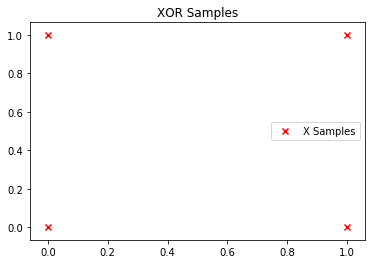

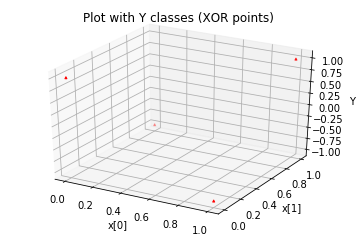

In [32]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# x1, x2, x3, x4
X = np.matrix([[1,1], [0,0], [1,0], [0,1]])
# y1, y2, y3, y4
Y = np.array([[1], [1], [-1], [-1]])

print('X: \n',X.T)
print('Y: \n',Y.T)
plt.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(), color = 'r',marker='x', label = 'X Samples')
plt.legend()    
plt.title('XOR Samples')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(), np.array(Y[:,0]).flatten(), s=int(Y.shape[0]), c='r', marker='^')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('Y')
plt.show()

#### (b) Implement a network to estimate the function that is generating these samples.

- Wh & Wz are the weight matrices, of dimension previous layer size * next layer size.
- X is the input matrix, dimension 4 * 2 = all combinations of 2 truth values.
- Y is the corresponding target value of XOR of the 4 pairs of values in X.
- Z is the vector of learned values for XOR.

###### Comment on how you choose your parameters.

- Since the input data comprises 2 operands for the XOR operation, the input layer devotes 1 neuron per operand. 
- The result of the XOR operation is one truth value, so we have one output node. 
- The hidden layer can have any number of nodes, 3 seems sufficient
- Initialise the weights. Setting them all to the same value, e.g. zero, would be a poor choice because the weights are very likely to end up different from each other


In [103]:


'''
 A numpy based neural network implementation
'''
class NN:
    
    def sigmoid(x): return 1.0/(1.0 + np.exp(-x))
    def sigmoid_prime(x): return sigmoid(x)*(1.0-sigmoid(x))
    def tanh(x): return np.tanh(x)
    def tanh_prime(x): return 1.0 - x**2
    
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):

        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            if k % 10000 == 0:
                print('epochs:', k)
            
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a


out_vector = NN([2,2,1])

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

out_vector.fit(X, y)
print(y)

predicton = np.zeros([1,4])
i=0
for e in X:
    if(i<4):
        predicton[0][i] = out_vector.predict(e)
        print(e,out_vector.predict(e))
        i = i+1
    else:
        i=0       

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 1 1 0]
[0 0] [0.0008165]
[0 1] [0.99651282]
[1 0] [0.99667517]
[1 1] [-0.01009606]


#### (c) Visualize the final classification regions on the 2 dimensional space

- In order to clearly visualize this we should draw multiple linear classifiers
- This can be achieved by either drawing contours or the hyperplane through the two regions identified in layers of the classifier

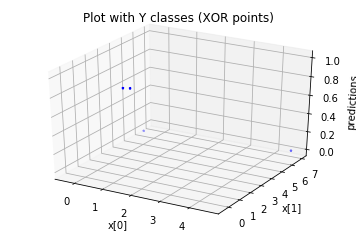

C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


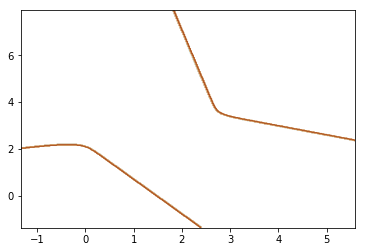

In [114]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(),np.array(predicton[0,:]).flatten() , s=int(y.shape[0]), c='b', marker='*')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('predictions')
plt.show()


import scipy
from sklearn import svm
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(X, Y)
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

#### (d) generate Gaussian random noise centered on these locations

- x1 ∼ m1 = [1, 1]T, S1 = S y1 = +1
- x2 ∼ m1 = [0, 0]T, S2 = S y1 = +1
- x3 ∼ m1 = [1, 0]T, S3 = S y1 = −1
- x4 ∼ m1 = [0, 1]T, S4 = S y1 = −1
- S = [[s0,0] [0, s0]]

S = Covariance 



### Running for covariance = 0.5


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 1 1 0]
[1.6104164  1.60372133] [-5.79007532e-05]
[-1.17228981  1.24832816] [0.99568361]
[ 1.96705591 -0.07407664] [0.99545149]
[0.84546539 0.95717647] [9.14296131e-06]


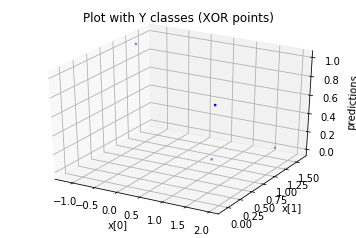

In [108]:
def generateGaussian(sigma):
    m0 = (1,  1)
    m1 = (0,  0)
    m2 = (1,  0)
    m3 = (0,  1)
    cov = [[sigma,  0], [0, sigma]]
    x0 = np.random.multivariate_normal(m0, cov, 1)
    x1 = np.random.multivariate_normal(m1, cov, 1)
    x2 = np.random.multivariate_normal(m2, cov, 1)
    x3 = np.random.multivariate_normal(m3, cov, 1)
    print(X)
    X_vec = np.zeros([4,2])
    X_vec[0,:] = (x0 + X[0,:])
    X_vec[1,:] = (x1 + X[1,:])
    X_vec[2,:] = (x2 + X[2,:])
    X_vec[3,:] = (x3 + X[3,:])
    return X_vec

# Generate the data for sigma = 0.5
X_generated = generateGaussian(0.5)



out_vector = NN([2,2,1])
X = X_generated
y = np.array([0, 1, 1, 0])
out_vector.fit(X, y)
print(y)
predicton = np.zeros([1,4])
i=0
for e in X:
    if(i<4):
        predicton[0][i] = out_vector.predict(e)
        print(e,out_vector.predict(e))
        i = i+1
    else:
        i=0       
#print(predicton)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(),np.array(predicton[0,:]).flatten() , s=int(y.shape[0]), c='b', marker='*')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('predictions')
plt.show()

### Running for covariance = 1

[[ 3.24939747  4.15117176]
 [ 1.16272598  0.78207415]
 [ 2.22959133  0.10182728]
 [-0.63952265  2.83357236]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 1 1 0]
[3.60022722 6.01764778] [-1.05348879e-05]
[-0.9833318   0.38698302] [0.9967276]
[2.96866475 0.77909607] [0.99823464]
[-0.41194481  3.44771688] [4.71436047e-06]


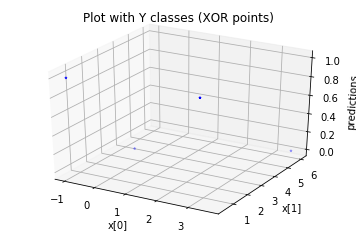

In [110]:
# Generate the data for sigma = 1
X_generated = generateGaussian(1)



out_vector = NN([2,2,1])
X = X_generated
y = np.array([0, 1, 1, 0])
out_vector.fit(X, y)
print(y)
predicton = np.zeros([1,4])
i=0
for e in X:
    if(i<4):
        predicton[0][i] = out_vector.predict(e)
        print(e,out_vector.predict(e))
        i = i+1
    else:
        i=0       

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(),np.array(predicton[0,:]).flatten() , s=int(y.shape[0]), c='b', marker='*')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('predictions')
plt.show()

### Running for covariance = 2

[[ 3.60022722  6.01764778]
 [-0.9833318   0.38698302]
 [ 2.96866475  0.77909607]
 [-0.41194481  3.44771688]]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 1 1 0]
[4.60855699 6.91513359] [0.00200687]
[ 1.59583657 -0.36492002] [0.99760703]
[ 1.7836794 -0.2379257] [0.99788448]
[-0.34263323  5.905201  ] [-0.00012823]


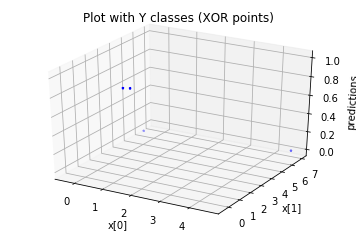

In [111]:
# Generate the data for sigma = 2
X_generated = generateGaussian(2)

out_vector = NN([2,2,1])
X = X_generated
y = np.array([0, 1, 1, 0])
out_vector.fit(X, y)
print(y)
predicton = np.zeros([1,4])
i=0
for e in X:
    if(i<4):
        predicton[0][i] = out_vector.predict(e)
        print(e,out_vector.predict(e))
        i = i+1
    else:
        i=0       

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(),np.array(predicton[0,:]).flatten() , s=int(y.shape[0]), c='b', marker='*')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('predictions')
plt.show()

### As the covariance increases we see that the separation between the two point decreases and hence increasingly difficult to classify in this space.